In [1]:
#import statements
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

[*********************100%%**********************]  2 of 2 completed


Text(0, 0.5, 'Cummulative Returns')

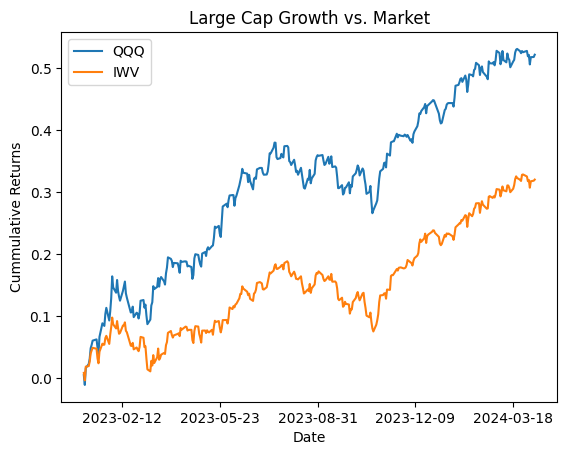

In [134]:
#intialize list of securities and start date
tickers = ['QQQ', 'IWV']
start = '2023-01-01'

stk_data = yf.download(tickers,start) #download security return data from yahoo


df = pd.DataFrame(stk_data) #initialize stock data as dataframe

#query/format data
df = df.stack(level=1).reindex(columns=['Adj Close']).unstack(level=1).droplevel(level=0, axis=1).loc[df.index >= start].dropna()

#plot returns
for ticker in tickers:
  df[ticker] = np.log(df[ticker]/df[ticker].shift(1)) #log stock returns
  df.loc[:, ticker] = np.cumsum(df[ticker]) #cumulative returns 
  sns.lineplot(data = df, x = df.index, y = df[ticker], label = ticker) #plot

#set plot attributes
plt.gca().xaxis.set_major_locator(mtick.MaxNLocator(nbins=6))
plt.title('Large Cap Growth vs. Market')
plt.ylabel('Cummulative Returns')

/var/folders/m8/5jc738f97052zcblnk5wgd6h0000gn/T/ipykernel_62395/65146863.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2 = pd.read_csv("inflation.csv", parse_dates=['Date'])


Text(0, 0.5, 'Inflation (%)')

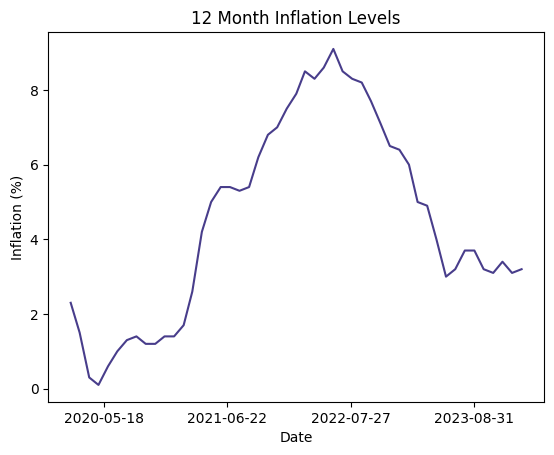

In [135]:
#import inflation data
df2 = pd.read_csv("inflation.csv", parse_dates=['Date'])

#plot inflation data
sns.lineplot(data = df2, x = df2["Date"], y = df2["Inflation"], color = 'darkslateblue')

#set plot attributes
plt.gca().xaxis.set_major_locator(mtick.MaxNLocator(nbins=5))
plt.title('12 Month Inflation Levels')
plt.ylabel("Inflation (%)")

/var/folders/m8/5jc738f97052zcblnk5wgd6h0000gn/T/ipykernel_62395/792793184.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3 = pd.read_csv("ffrate.csv", parse_dates=['Date'])


Text(0, 0.5, 'Federal Funds Rate (%)')

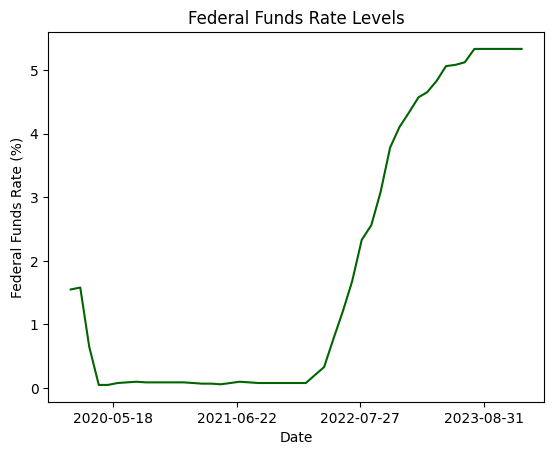

In [132]:
#import federal funds rates
df3 = pd.read_csv("ffrate.csv", parse_dates=['Date'])

#plot historical federal funds rates
sns.lineplot(data = df3, x = df3["Date"], y = df3["Federal Funds Rate"], color = 'darkgreen')

#set plot attributes
plt.gca().xaxis.set_major_locator(mtick.MaxNLocator(nbins=5))
plt.title('Federal Funds Rate Levels')
plt.ylabel("Federal Funds Rate (%)")

[*********************100%%**********************]  2 of 2 completed


Text(0, 0.5, 'Cummulative Returns')

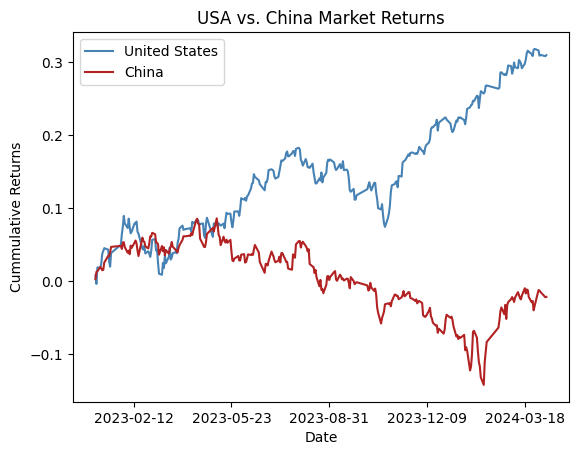

In [136]:

#intialize list of securities and start date
tickers = ["^GSPC", '000001.SS']
start = '2023-01-01'

stk_data = yf.download(tickers,start) #download security return data from yahoo

#initialize stock data as dataframe
df = pd.DataFrame(stk_data)

#format data
df = df.stack(level=1).reindex(columns=['Adj Close']).unstack(level=1).droplevel(level=0, axis=1).loc[df.index >= start].dropna()
i = 1 #initialize counter for each stock

for ticker in tickers:
  df[ticker] = np.log(df[ticker]/df[ticker].shift(1)) #log returns
  df.loc[:, ticker] = np.cumsum(df[ticker]) #cummulative returns

  #USA plot
  if i == 1:
    sns.lineplot(data = df, x = df.index, y = df[ticker], color = 'steelblue', label = "United States")
  
  #China plot
  elif i == 2:
    sns.lineplot(data = df, x = df.index, y = df[ticker], color = 'firebrick', label = "China")
  i += 1

#format plot
plt.gca().xaxis.set_major_locator(mtick.MaxNLocator(nbins=6))
plt.title('USA vs. China Market Returns')
plt.ylabel('Cummulative Returns')